In [84]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU,Conv1D,MaxPooling1D
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import gc
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [86]:
train = pd.read_csv("./data/train.csv")
submit = pd.read_csv("./data/test.csv")
submit_template = pd.read_csv("./data/sample_submission.csv", header = 0)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(train, train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]], test_size = 0.10, random_state = 42)

In [88]:
list_sentences_train = X_train["comment_text"]
list_sentences_test = X_test["comment_text"]
list_sentences_submit = submit["comment_text"]

In [89]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features,char_level=True)

In [90]:
tokenizer.fit_on_texts(list(list_sentences_train))

In [91]:
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_sentences_test = tokenizer.texts_to_sequences(list_sentences_test)
list_tokenized_submit = tokenizer.texts_to_sequences(list_sentences_submit)

In [92]:
maxlen = 500
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_sentences_test, maxlen=maxlen)
X_sub = pad_sequences(list_tokenized_submit, maxlen=maxlen)

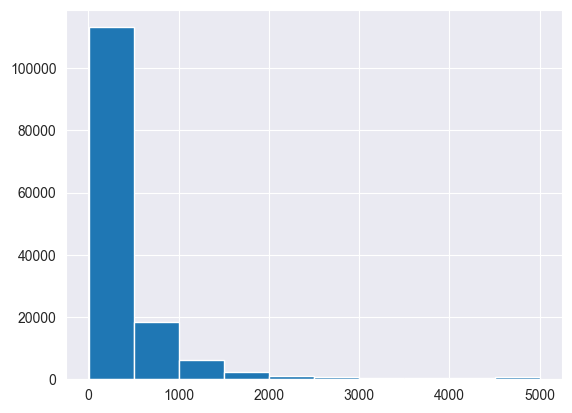

In [93]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords)
plt.show()

In [94]:
inp = Input(shape=(maxlen, ))

In [95]:
embed_size = 240
x = Embedding(len(tokenizer.word_index)+1, embed_size)(inp)

In [96]:
x = Conv1D(filters=100,kernel_size=4,padding='same', activation='relu')(x)

In [97]:
x=MaxPooling1D(pool_size=4)(x)

In [98]:
x = Bidirectional(GRU(60, return_sequences=True,name='lstm_layer',dropout=0.2,recurrent_dropout=0.2))(x)

In [99]:
x = GlobalMaxPool1D()(x)

In [100]:
x = Dense(50, activation="relu")(x)

In [101]:
x = Dropout(0.2)(x)
x = Dense(6, activation="sigmoid")(x)

In [102]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                 metrics=['accuracy'])

In [103]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 500, 240)          492720    
                                                                 
 conv1d (Conv1D)             (None, 500, 100)          96100     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 125, 100)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 125, 120)         58320     
 l)                                                              
                                                                 
 global_max_pooling1d_2 (Glo  (None, 120)              0   

In [104]:
batch_size = 32
epochs = 6

In [ ]:
hist = model.fit(X_t,y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_te,y_test))

Epoch 1/6
4488/4488 [==============================] - 1097s 243ms/step - loss: 0.0792 - accuracy: 0.9432 - val_loss: 0.0587 - val_accuracy: 0.9940
Epoch 2/6
4488/4488 [==============================] - 1065s 237ms/step - loss: 0.0570 - accuracy: 0.9929 - val_loss: 0.0517 - val_accuracy: 0.9929
Epoch 3/6
4488/4488 [==============================] - 1038s 231ms/step - loss: 0.0526 - accuracy: 0.9925 - val_loss: 0.0510 - val_accuracy: 0.9940
Epoch 4/6
4488/4488 [==============================] - 1062s 237ms/step - loss: 0.0503 - accuracy: 0.9914 - val_loss: 0.0474 - val_accuracy: 0.9933
Epoch 5/6
4488/4488 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9905